<a href="https://colab.research.google.com/github/Devil-Rick/Fake-Job-Detection/blob/main/Fake_Job_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Year Project 
## Group - 
#### Members :
* Saptarshi Dhibar - 10200118026
* Sanchita Pandit - 10200118027
* Niladri Sarker - 10200118037
* Koustav Roy - 10200118038

# **Fake Job Detection**
The `Employment Scam Aegean Dataset `(EMSCAD) is a dataset containing 17,880 `real-life job` ads that aims at providing a clear picture of the `Employment Scam problem`.


---



---



## Dataset Description
* Name - Description
* Title	- The title of the job ad entry.
* Location	- Geographical location of the job ad.
* Department	- Corporate department (e.g. sales).
* Salary range	- Indicative salary range (e.g. $50,000-$60,000)
* Company profile -	A brief company description.
* Description	- The details description of the job ad.
* Requirements -	Enlisted requirements for the job opening.
* Benefits	- Enlisted offered benefits by the employer.
* Telecommuting -	True for telecommuting positions.
* Company logo -	True if company logo is present.
* Questions -	True if screening questions are present.
* Fraudulent -	Classification attribute.
In balanced	Selected for the balanced dataset
* Employment type -	Full-type, Part-time, Contract, etc.
* Required experience	- Executive, Entry level, Intern, etc.
* Required education -	Doctorate, Master’s Degree, Bachelor, etc.
* Industry	- Automotive, IT, Health care, Real estate, etc.
* Function -	Consulting, Engineering, Research, Sales etc.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the required libraries

%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Fake Job Dataset/fake_job_postings.csv')

In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
df.shape

(17880, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.fillna(' ', inplace=True)

### Observation from Cell above

# **Starting The EDA**  

In [10]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

### Observation from Cell above



,fraudulent,title
0,0,17014
1,1,866


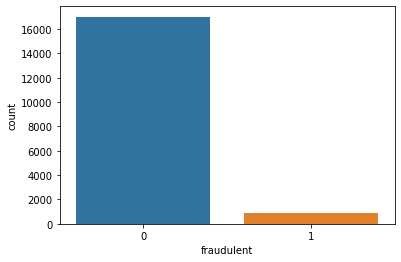

In [11]:
sns.countplot(df['fraudulent']);
df.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

### Observation from Cell above

In [12]:
df.title.value_counts()

English Teacher Abroad                                           311
Customer Service Associate                                       146
Graduates: English Teacher Abroad (Conversational)               144
English Teacher Abroad                                            95
Software Engineer                                                 86
                                                                ... 
Visual/Graphic Design Intern                                       1
Senior Software Test Engineer                                      1
Product Sales Manager                                              1
A Leading Trainer in Caulfield SEEKS Exp. Track Work Rider FT      1
VP Business Development                                            1
Name: title, Length: 11231, dtype: int64

In [13]:
df.title.where(df.fraudulent == 1).value_counts()

Data Entry Admin/Clerical Positions - Work From Home               21
Cruise Staff Wanted *URGENT*                                       21
Home Based Payroll Typist/Data Entry Clerks Positions Available    21
Customer Service Representative                                    17
Administrative Assistant                                           16
                                                                   ..
CAD Operator                                                        1
DIVISION ELECTRICAL ENGINEER                                        1
ObjC Developer                                                      1
Military Outreach Consultant (Telecommute)                          1
Finance Assistant                                                   1
Name: title, Length: 560, dtype: int64

In [14]:
df.location.unique()

array(['US, NY, New York', 'NZ, , Auckland', 'US, IA, Wever', ...,
       'US, CA, los Angeles', 'CA, , Ottawa', 'GB, WSX, Chichester'],
      dtype=object)

In [15]:
# Creating a new Column Country from the existing Location
def country(location):
  out = location.split(',')
  return out[0]
df['Country'] = df.location.apply(country) 
df.Country.value_counts()

US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
UG        1
JM        1
KZ        1
CO        1
MA        1
Name: Country, Length: 91, dtype: int64

In [16]:
df.Country.where(df.fraudulent == 1).value_counts()

US    730
AU     40
GB     23
       19
CA     12
MY     12
QA      6
BH      5
IN      4
PL      3
TW      2
ID      1
SA      1
EE      1
EG      1
ZA      1
AE      1
ES      1
PK      1
BR      1
PH      1
Name: Country, dtype: int64

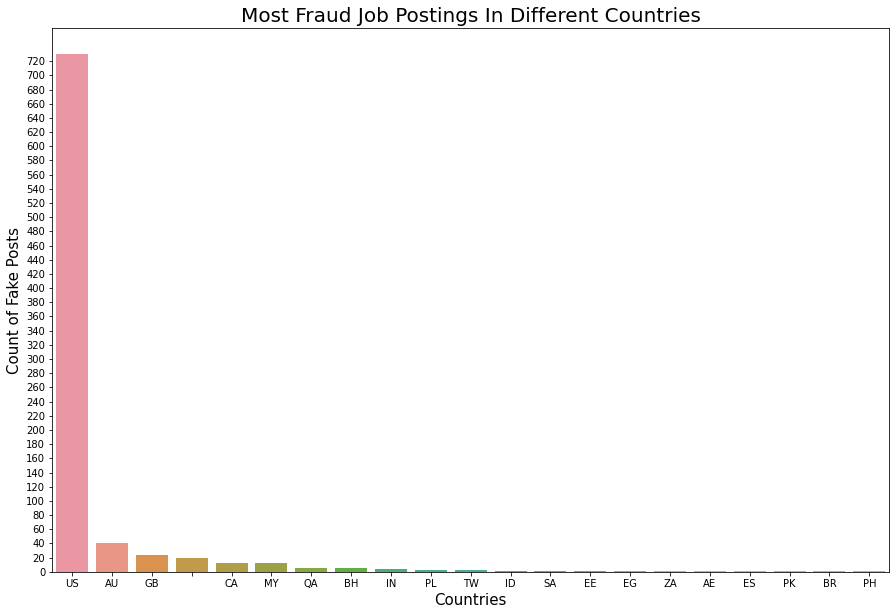

In [28]:
fraud_Country = dict(df.Country.where(df.fraudulent == 1).value_counts())
values = list(fraud_Country.values())
keys = list(fraud_Country.keys())
# Plot
plt.figure(figsize=(15,10))
plt.title('Most Fraud Job Postings In Different Countries' , size = 20)
plt.yticks(np.arange(0 , max(values)+1 , 20))
plt.ylabel('Count of Fake Posts' , size = 15)
plt.xlabel('Countries' , size = 15)
sns.barplot(x = keys , y = values);

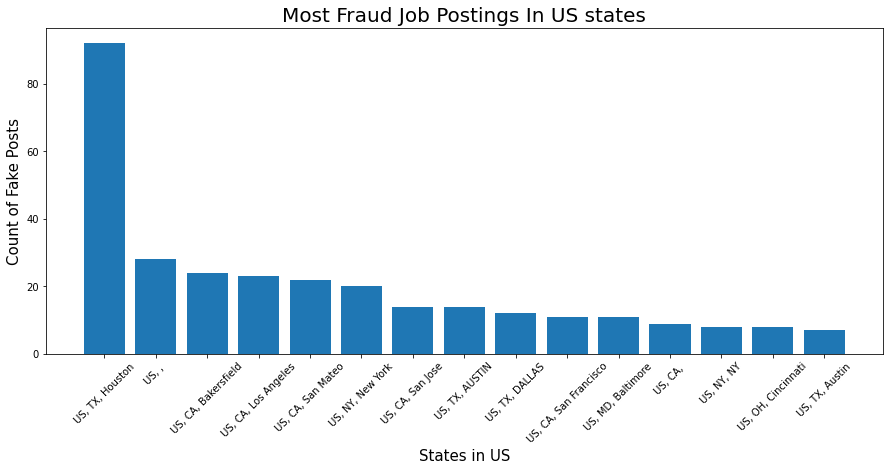

In [29]:
most_fraud = dict(df.location.where((df.Country == 'US') & (df.fraudulent == 1)).value_counts()[:15])

# plot
plt.figure(figsize=(15,6))
plt.title('Most Fraud Job Postings In US states' , size = 20)
plt.xticks(rotation= 45)
plt.ylabel('Count of Fake Posts' , size = 15)
plt.xlabel('States in US' , size = 15)
plt.bar(most_fraud.keys() , most_fraud.values());

## Cleaning and Pre-Processing The Data